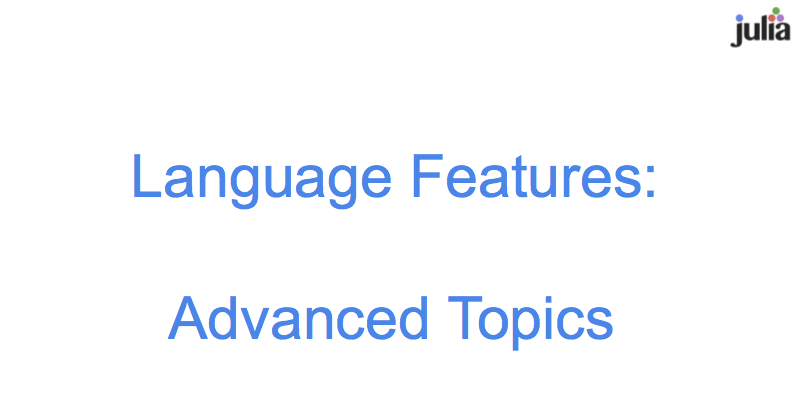

In [1]:
using FileIO   # Let's us load some figures into cells
img = load("juliaTalk_adv1_fig.png")

# Julia for Data Scientists --- Yes, there are Dataframes!

### We can load external data like a *CSV*

In [2]:
using DataFrames, CSV
t =1
h = CSV.read("housing.csv");

In [4]:
typeof(h)

DataFrames.DataFrame

In [ ]:
head(h,4) 

In [ ]:
tail(h,5)

In [ ]:
describe(h)

### Getting columns of data frame

**Notice** Dataframe column names are *Symbols* 

Example: `:col_name`

In [ ]:
h[:Neighborhood][1:5] #get first column of data first 5 rows

# Machine Learning (ML) with Julia

## Unsupervised Learning

In [3]:
using RDatasets

#Get some well known data from R data set
iris = dataset("datasets", "iris")
head(iris)

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


### K-means Clustering

In [ ]:
using Clustering
using Gadfly  #One way to do visualizations

features = Array{Float64}(iris[:, 1:4])   # use matrix() on Julia v0.2
result = kmeans( features, 3 )    # onto 3 clusters

plot(iris, x = "PetalLength", 
           y = "PetalWidth", 
           color = result.assignments, 
           Geom.point)

### Principal Component Analysis

In [ ]:
using MultivariateStats

pc = fit(PCA, features; maxoutdim = 2)
reduced = transform(pc, features)
@show size(reduced)

plot(iris, x = reduced[1,:], y = reduced[2,:], color = "Species", Geom.point)


## Supervised Learning - Regression

ref: http://nbviewer.jupyter.org/github/bensadeghi/julia-datascience-talk/blob/master/datascience-talk.ipynb

In [ ]:
using MultivariateStats

# Generate a noisy linear system
features = rand(1000, 3)                         # feature matrix
coeffs = rand(3)                                 # ground truth of weights
targets = features * coeffs + 0.1 * randn(1000)  # generate response

# Linear Least Square Regression
coeffs_llsq = llsq(features, targets; bias=false)

# Ridge Regression - used with multicollinearity (i.e., ndependent variables are highly correlated)
coeffs_ridge = ridge(features, targets, 0.1; bias=false) # regularization coef = 0.1

@show coeffs
@show coeffs_llsq
@show coeffs_ridge ;

### Cross Validation: K-Fold Example

In [ ]:
using MLBase, MultivariateStats

n = length(targets)

# Define training and error evaluation functions
function training(inds)
    coeffs = ridge(features[inds, :], targets[inds], 0.1; bias=false)
    return coeffs
end

function error_evaluation(coeffs, inds)
    y = features[inds, :] * coeffs 
    rms_error = sqrt(mean(abs2(targets[inds] .- y)))
    return rms_error
end

# Cross validate
scores = cross_validate(
    inds -> training(inds),
    (coeffs, inds) -> error_evaluation(coeffs, inds),
    n,              # total number of samples
    Kfold(n, 3))    # cross validation plan: 3-fold

# Get the mean and std of scores
@show scores
@show mean_and_std(scores) ;

In [ ]:
img = load("juliaTalk_adv4_fig.png")

## Object-Oriented Programming
ref: http://nbviewer.jupyter.org/github/bensadeghi/julia-datascience-talk/blob/master/datascience-talk.ipynb

In [ ]:
# Method Overloading

type SimpleObject
    data::Union{Integer, String}
    set::Function

    function SimpleObject()
        this = new()
        this.data = ""

        function setter(x::Integer)
            println("Setting an integer")
            this.data = x
        end
        function setter(x::String)
            println("Setting a string")
            this.data = x
        end
        this.set = setter

        return this
    end
end

obj = SimpleObject()
obj.set(99)
obj.set("hello")

## Metaprogramming
ref: http://nbviewer.jupyter.org/github/bensadeghi/julia-datascience-talk/blob/master/datascience-talk.ipynb

### Legacy of Lisp in the Julia Language

Ability for program to transform and generate its own code


In [ ]:
parse("power1(x) = x ^ 1") # example of creating an expression designated as a symbol

In [ ]:
# Code Generation
# Functions for exponentiating to the powers of 1 to 5
for n in 1:5
    s = "power$n(x) = x ^ $n"
    println(s)
    expression = parse(s) # Create an expression  
    eval(expression) # Execute the expressiong 
end


In [ ]:
power5( 2 )  # one-line Function generated from expression

## Macros
ref: http://nbviewer.jupyter.org/github/bensadeghi/julia-datascience-talk/blob/master/datascience-talk.ipynb

In [ ]:
# Macros: Creating our own Crude Timer Example

macro timeit(expression)
    quote
        t = time()
        result = $expression    # evaluation
        elapsed = time() - t
        println( "elapsed time: ", elapsed )
        return result
    end
end

In [ ]:
@timeit cos(2pi)

In [ ]:
@timeit cos(2pi)

In [ ]:
img = load("juliaTalk_adv2_fig.png")

## Parallel Computing

* Dealing with data in parallel way
* Connecting multiple computers as a cluster and using their CPUs for computation
* Used when handling BIG data and/or running complex algorithms especially with BIG data
* Executing computations fasters with multiple CPUs running in Parallel

## How do we do it?

**ref:**

https://www.intel.com/content/dam/www/public/us/en/documents/presentation/julia-in-parallel-and-high-performance-computing.pdf

### Sequential method for calculating pi

In [ ]:
#Sequential method for calculating pi
function findpi(n)
    inside = 0
    for i = 1:n
        x = rand()
        y = rand()
        inside += (x^2 + y^2) <= 1
    end
    4 * inside / n
end

In [ ]:
nprocs() #Number of processes

In [ ]:
@time findpi(10000); #10 Thousand

In [ ]:
@time findpi(100_000_000); #100 Million

In [ ]:
@time findpi(1_000_000_000); #1 billion

### Parallel method for calculating pi

1. `addprocs()`  -  add workers

2. `@everywhere macro` - equivalent to calling evaluation on every processor/worker

3. `pmap` - distributes the compuation over all specified workers

4. `nworkers()` - Get the number of available worker processes. This is one less than `nprocs()`

In [ ]:
addprocs(4);
nprocs() #Check for number of processes

In [ ]:
procs() # list of all process identifers on the same physical node

In [ ]:
workers() # Reutnr a list of all worker process identifiers

In [ ]:
@everywhere function findpi(n)
    inside = 0
    for i = 1:n
        x = rand()
        y = rand()
        inside += (x^2 + y^2) <= 1
    end
    4 * inside / n
end

In [ ]:
pfindpi(N) = mean(pmap(n->findpi(n), [N/nworkers() for i = 1:nworkers()]));

In [ ]:
@time pfindpi(1_000_000_000); 1 billion

In [ ]:
@time pfindpi(10_000_000_000); #10 Billion

In [ ]:
#Simple Parallel loop example
@everywhere a = [1 2 3 4]
@parallel  for i=1:4
 a[i]=i*1000
 print(a)
end

In [ ]:
nworkers()

In [ ]:
procs()